# PESU I/O - Intro to ML Final Project

### Importing Libraries and Modules

In [381]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing Dataset

In [382]:
dataset = pd.read_csv('IMDb_All_Genres_etf_clean1.csv')
dataset

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,$14.19M,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,$0.03M,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,$4.92M,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi"


## Data Preprocessing

### Dropping movies with unknown grosses

In [383]:
dataset = dataset.replace('Gross Unkown', np.nan)
dataset = dataset.dropna(subset=['Total_Gross'])

In [384]:
dataset['Total_Gross'] = dataset['Total_Gross'].str.replace('M', '')
dataset['Total_Gross'] = dataset['Total_Gross'].str.replace('$', '')
dataset['Total_Gross'] = pd.to_numeric(dataset['Total_Gross'], errors='coerce').fillna(0).astype(float)

C:\Users\Vyoman\AppData\Local\Temp\ipykernel_24136\2791290730.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Total_Gross'] = dataset['Total_Gross'].str.replace('$', '')


### Splitting the actor column and binary encoding it

In [385]:
dataset[['Actor 1', 'Actor 2','Actor 3','Actor 4']] = dataset['Actors'].str.split(',',expand=True)
dataset = dataset.drop('Actors', axis=1)
dataset

,Movie_Title,Year,Director,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre,Actor 1,Actor 2,Actor 3,Actor 4
1,The Dark Knight,2008,Christopher Nolan,9.0,152,UA,534.86,Action,"Crime, Drama",Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,9.0,201,U,377.85,Action,"Adventure, Drama",Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
3,Inception,2010,Christopher Nolan,8.8,148,UA,292.58,Action,"Adventure, Sci-Fi",Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,8.8,179,UA,342.55,Action,"Adventure, Drama",Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom
5,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,8.8,178,U,315.54,Action,"Adventure, Drama",Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Son of the Mask,2005,Lawrence Guterman,2.2,94,U,17.02,Comedy,"Family, Fantasy",Jamie Kennedy,Traylor Howard,Alan Cumming,Liam Falconer
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer",1.9,87,PG-13,14.19,Comedy,Sci-Fi,Carmen Electra,Vanessa Lachey,Nicole Parker,Matt Lanter
5558,The Hottie & the Nottie,2008,Tom Putnam,1.9,91,PG-13,0.03,Comedy,Romance,Paris Hilton,Joel David Moore,Christine Lakin,Johann Urb
5559,From Justin to Kelly,2003,Robert Iscove,1.9,81,PG,4.92,Comedy,"Musical, Romance",Kelly Clarkson,Justin Guarini,Katherine Bailess,Anika Noni Rose


In [386]:
dataset = dataset.loc[:,['Movie_Title','Director','Year','Rating','Runtime(Mins)','Actor 1','Actor 2','Actor 3','Actor 4','main_genre','side_genre','Total_Gross']]
dataset

,Movie_Title,Director,Year,Rating,Runtime(Mins),Actor 1,Actor 2,Actor 3,Actor 4,main_genre,side_genre,Total_Gross
1,The Dark Knight,Christopher Nolan,2008,9.0,152,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,"Crime, Drama",534.86
2,The Lord of the Rings: The Return of the King,Peter Jackson,2003,9.0,201,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,"Adventure, Drama",377.85
3,Inception,Christopher Nolan,2010,8.8,148,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,"Adventure, Sci-Fi",292.58
4,The Lord of the Rings: The Two Towers,Peter Jackson,2002,8.8,179,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,Action,"Adventure, Drama",342.55
5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,2001,8.8,178,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,"Adventure, Drama",315.54
...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Son of the Mask,Lawrence Guterman,2005,2.2,94,Jamie Kennedy,Traylor Howard,Alan Cumming,Liam Falconer,Comedy,"Family, Fantasy",17.02
5557,Disaster Movie,"Directors:Jason Friedberg, Aaron Seltzer",2008,1.9,87,Carmen Electra,Vanessa Lachey,Nicole Parker,Matt Lanter,Comedy,Sci-Fi,14.19
5558,The Hottie & the Nottie,Tom Putnam,2008,1.9,91,Paris Hilton,Joel David Moore,Christine Lakin,Johann Urb,Comedy,Romance,0.03
5559,From Justin to Kelly,Robert Iscove,2003,1.9,81,Kelly Clarkson,Justin Guarini,Katherine Bailess,Anika Noni Rose,Comedy,"Musical, Romance",4.92


In [387]:
from category_encoders.binary import BinaryEncoder
columns = ["Actor 1", "Actor 2", "Actor 3", "Actor 4"]
encoder = BinaryEncoder(cols=columns, drop_invariant=False)
dataset=encoder.fit_transform(dataset)
dataset

,Movie_Title,Director,Year,Rating,Runtime(Mins),Actor 1_0,Actor 1_1,Actor 1_2,Actor 1_3,Actor 1_4,...,Actor 4_5,Actor 4_6,Actor 4_7,Actor 4_8,Actor 4_9,Actor 4_10,Actor 4_11,main_genre,side_genre,Total_Gross
1,The Dark Knight,Christopher Nolan,2008,9.0,152,0,0,0,0,0,...,0,0,0,0,0,0,1,Action,"Crime, Drama",534.86
2,The Lord of the Rings: The Return of the King,Peter Jackson,2003,9.0,201,0,0,0,0,0,...,0,0,0,0,0,1,0,Action,"Adventure, Drama",377.85
3,Inception,Christopher Nolan,2010,8.8,148,0,0,0,0,0,...,0,0,0,0,0,1,1,Action,"Adventure, Sci-Fi",292.58
4,The Lord of the Rings: The Two Towers,Peter Jackson,2002,8.8,179,0,0,0,0,0,...,0,0,0,0,0,1,0,Action,"Adventure, Drama",342.55
5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,2001,8.8,178,0,0,0,0,0,...,0,0,0,0,1,0,0,Action,"Adventure, Drama",315.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Son of the Mask,Lawrence Guterman,2005,2.2,94,1,1,0,0,1,...,1,0,1,1,1,0,0,Comedy,"Family, Fantasy",17.02
5557,Disaster Movie,"Directors:Jason Friedberg, Aaron Seltzer",2008,1.9,87,1,1,0,0,1,...,1,0,1,1,1,0,1,Comedy,Sci-Fi,14.19
5558,The Hottie & the Nottie,Tom Putnam,2008,1.9,91,1,1,0,0,1,...,1,0,1,1,1,1,0,Comedy,Romance,0.03
5559,From Justin to Kelly,Robert Iscove,2003,1.9,81,1,1,0,0,1,...,1,0,1,1,1,1,1,Comedy,"Musical, Romance",4.92


### Binary Encoding the Main Genre

In [388]:
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder(cols=['main_genre'], drop_invariant=False)
dataset=encoder.fit_transform(dataset)
dataset

,Movie_Title,Director,Year,Rating,Runtime(Mins),Actor 1_0,Actor 1_1,Actor 1_2,Actor 1_3,Actor 1_4,...,Actor 4_8,Actor 4_9,Actor 4_10,Actor 4_11,main_genre_0,main_genre_1,main_genre_2,main_genre_3,side_genre,Total_Gross
1,The Dark Knight,Christopher Nolan,2008,9.0,152,0,0,0,0,0,...,0,0,0,1,0,0,0,1,"Crime, Drama",534.86
2,The Lord of the Rings: The Return of the King,Peter Jackson,2003,9.0,201,0,0,0,0,0,...,0,0,1,0,0,0,0,1,"Adventure, Drama",377.85
3,Inception,Christopher Nolan,2010,8.8,148,0,0,0,0,0,...,0,0,1,1,0,0,0,1,"Adventure, Sci-Fi",292.58
4,The Lord of the Rings: The Two Towers,Peter Jackson,2002,8.8,179,0,0,0,0,0,...,0,0,1,0,0,0,0,1,"Adventure, Drama",342.55
5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,2001,8.8,178,0,0,0,0,0,...,0,1,0,0,0,0,0,1,"Adventure, Drama",315.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Son of the Mask,Lawrence Guterman,2005,2.2,94,1,1,0,0,1,...,1,1,0,0,1,0,0,0,"Family, Fantasy",17.02
5557,Disaster Movie,"Directors:Jason Friedberg, Aaron Seltzer",2008,1.9,87,1,1,0,0,1,...,1,1,0,1,1,0,0,0,Sci-Fi,14.19
5558,The Hottie & the Nottie,Tom Putnam,2008,1.9,91,1,1,0,0,1,...,1,1,1,0,1,0,0,0,Romance,0.03
5559,From Justin to Kelly,Robert Iscove,2003,1.9,81,1,1,0,0,1,...,1,1,1,1,1,0,0,0,"Musical, Romance",4.92


### Splitting the Side Genres and binary encoding them

In [389]:
from category_encoders.binary import BinaryEncoder
dataset[['Side_Genre1','Side_Genre2']] = dataset['side_genre'].str.split(',',expand=True)
dataset = dataset.drop('side_genre', axis=1)
dataset

,Movie_Title,Director,Year,Rating,Runtime(Mins),Actor 1_0,Actor 1_1,Actor 1_2,Actor 1_3,Actor 1_4,...,Actor 4_9,Actor 4_10,Actor 4_11,main_genre_0,main_genre_1,main_genre_2,main_genre_3,Total_Gross,Side_Genre1,Side_Genre2
1,The Dark Knight,Christopher Nolan,2008,9.0,152,0,0,0,0,0,...,0,0,1,0,0,0,1,534.86,Crime,Drama
2,The Lord of the Rings: The Return of the King,Peter Jackson,2003,9.0,201,0,0,0,0,0,...,0,1,0,0,0,0,1,377.85,Adventure,Drama
3,Inception,Christopher Nolan,2010,8.8,148,0,0,0,0,0,...,0,1,1,0,0,0,1,292.58,Adventure,Sci-Fi
4,The Lord of the Rings: The Two Towers,Peter Jackson,2002,8.8,179,0,0,0,0,0,...,0,1,0,0,0,0,1,342.55,Adventure,Drama
5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,2001,8.8,178,0,0,0,0,0,...,1,0,0,0,0,0,1,315.54,Adventure,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Son of the Mask,Lawrence Guterman,2005,2.2,94,1,1,0,0,1,...,1,0,0,1,0,0,0,17.02,Family,Fantasy
5557,Disaster Movie,"Directors:Jason Friedberg, Aaron Seltzer",2008,1.9,87,1,1,0,0,1,...,1,0,1,1,0,0,0,14.19,Sci-Fi,None
5558,The Hottie & the Nottie,Tom Putnam,2008,1.9,91,1,1,0,0,1,...,1,1,0,1,0,0,0,0.03,Romance,None
5559,From Justin to Kelly,Robert Iscove,2003,1.9,81,1,1,0,0,1,...,1,1,1,1,0,0,0,4.92,Musical,Romance


In [390]:
from category_encoders.binary import BinaryEncoder
columns = ["Side_Genre1", "Side_Genre2"]
encoder = BinaryEncoder(cols=columns, drop_invariant=False)
dataset=encoder.fit_transform(dataset)
dataset

,Movie_Title,Director,Year,Rating,Runtime(Mins),Actor 1_0,Actor 1_1,Actor 1_2,Actor 1_3,Actor 1_4,...,Side_Genre1_0,Side_Genre1_1,Side_Genre1_2,Side_Genre1_3,Side_Genre1_4,Side_Genre2_0,Side_Genre2_1,Side_Genre2_2,Side_Genre2_3,Side_Genre2_4
1,The Dark Knight,Christopher Nolan,2008,9.0,152,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,The Lord of the Rings: The Return of the King,Peter Jackson,2003,9.0,201,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,Inception,Christopher Nolan,2010,8.8,148,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,The Lord of the Rings: The Two Towers,Peter Jackson,2002,8.8,179,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,2001,8.8,178,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Son of the Mask,Lawrence Guterman,2005,2.2,94,1,1,0,0,1,...,1,0,0,0,1,0,0,0,1,1
5557,Disaster Movie,"Directors:Jason Friedberg, Aaron Seltzer",2008,1.9,87,1,1,0,0,1,...,0,0,0,1,1,1,0,1,0,0
5558,The Hottie & the Nottie,Tom Putnam,2008,1.9,91,1,1,0,0,1,...,0,1,1,1,0,1,0,1,0,0
5559,From Justin to Kelly,Robert Iscove,2003,1.9,81,1,1,0,0,1,...,1,0,1,1,1,0,1,0,1,1


In [391]:
gross = dataset.pop('Total_Gross')
dataset.insert(66, 'Total_Gross', gross)
dataset

,Movie_Title,Director,Year,Rating,Runtime(Mins),Actor 1_0,Actor 1_1,Actor 1_2,Actor 1_3,Actor 1_4,...,Side_Genre1_1,Side_Genre1_2,Side_Genre1_3,Side_Genre1_4,Side_Genre2_0,Side_Genre2_1,Side_Genre2_2,Side_Genre2_3,Side_Genre2_4,Total_Gross
1,The Dark Knight,Christopher Nolan,2008,9.0,152,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,534.86
2,The Lord of the Rings: The Return of the King,Peter Jackson,2003,9.0,201,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,377.85
3,Inception,Christopher Nolan,2010,8.8,148,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,292.58
4,The Lord of the Rings: The Two Towers,Peter Jackson,2002,8.8,179,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,342.55
5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,2001,8.8,178,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,315.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,Son of the Mask,Lawrence Guterman,2005,2.2,94,1,1,0,0,1,...,0,0,0,1,0,0,0,1,1,17.02
5557,Disaster Movie,"Directors:Jason Friedberg, Aaron Seltzer",2008,1.9,87,1,1,0,0,1,...,0,0,1,1,1,0,1,0,0,14.19
5558,The Hottie & the Nottie,Tom Putnam,2008,1.9,91,1,1,0,0,1,...,1,1,1,0,1,0,1,0,0,0.03
5559,From Justin to Kelly,Robert Iscove,2003,1.9,81,1,1,0,0,1,...,0,1,1,1,0,1,0,1,1,4.92


### Taking independent and dependent variables

In [392]:
X = dataset.iloc[:, 2:66].values
Y = dataset.iloc[:, 66].values
X

array([[2.008e+03, 9.000e+00, 1.520e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.003e+03, 9.000e+00, 2.010e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.010e+03, 8.800e+00, 1.480e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.008e+03, 1.900e+00, 9.100e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.003e+03, 1.900e+00, 8.100e+01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [2.004e+03, 1.500e+00, 8.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [393]:
Y

array([5.3486e+02, 3.7785e+02, 2.9258e+02, ..., 3.0000e-02, 4.9200e+00,
       9.1100e+00])

### Splitting into test and training models

In [394]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

### Feature Scaling

In [395]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Artificial Neural Networks

### Experimenting with neurons, layers and epochs

In [396]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, input_shape = (64,), activation = 'relu'),   
    Dense(32, activation = 'relu'),                     
    Dense(16, activation = 'relu'),                     
    Dense(1, activation='linear')                                     
])

model.compile(optimizer = 'adam', loss = 'mae')

In [397]:
history = model.fit(X_train, y_train, batch_size=32, epochs=150, validation_split = 0.2)

Epoch 1/150


94/94 [==============================] - 1s 3ms/step - loss: 47.2654 - val_loss: 43.7041
Epoch 2/150
94/94 [==============================] - 0s 1ms/step - loss: 40.3841 - val_loss: 41.6474
Epoch 3/150
94/94 [==============================] - 0s 2ms/step - loss: 38.9077 - val_loss: 40.9678
Epoch 4/150
94/94 [==============================] - 0s 1ms/step - loss: 38.0965 - val_loss: 40.5961
Epoch 5/150
94/94 [==============================] - 0s 2ms/step - loss: 37.5073 - val_loss: 40.2724
Epoch 6/150
94/94 [==============================] - 0s 1ms/step - loss: 36.9509 - val_loss: 40.1185
Epoch 7/150
94/94 [==============================] - 0s 2ms/step - loss: 36.3035 - val_loss: 39.9906
Epoch 8/150
94/94 [==============================] - 0s 1ms/step - loss: 35.9068 - val_loss: 39.6738
Epoch 9/150
94/94 [==============================] - 0s 1ms/step - loss: 35.2337 - val_loss: 39.6237
Epoch 10/150
94/94 [==============================] - 0s 1ms/step - loss: 34.7718 - val_loss: 39.5686
E

In [398]:
loss = model.evaluate(X_test, y_test)
loss

30/30 [==============================] - 0s 1ms/step - loss: 46.1782


46.17822265625

In [399]:
loss_lst = history.history['loss']
loss_lst

[47.265438079833984,
 40.38410186767578,
 38.90770721435547,
 38.09648132324219,
 37.50726318359375,
 36.95085144042969,
 36.303489685058594,
 35.90678024291992,
 35.23370361328125,
 34.771793365478516,
 34.21490478515625,
 33.551387786865234,
 33.07682418823242,
 32.39973831176758,
 31.773956298828125,
 31.27869987487793,
 30.631210327148438,
 29.91684341430664,
 29.382797241210938,
 28.651260375976562,
 28.095970153808594,
 27.67450523376465,
 26.871631622314453,
 26.2337589263916,
 25.959997177124023,
 25.435640335083008,
 24.832082748413086,
 24.241140365600586,
 23.841066360473633,
 23.42328453063965,
 22.692541122436523,
 22.564502716064453,
 21.977954864501953,
 21.59359359741211,
 21.009878158569336,
 20.89645767211914,
 20.2653751373291,
 19.903879165649414,
 19.7501163482666,
 19.207735061645508,
 18.89304542541504,
 18.401630401611328,
 18.168010711669922,
 17.98454475402832,
 17.52461051940918,
 17.159765243530273,
 16.826702117919922,
 16.486207962036133,
 16.3633880615234

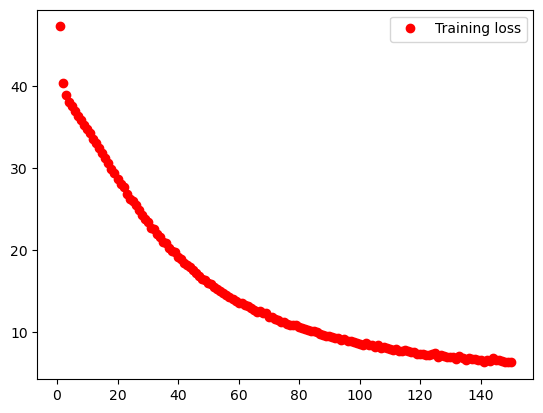

In [400]:
epochs = range(1, len(loss_lst)+1)
plt.plot(epochs, loss_lst, 'ro', label='Training loss')
plt.legend()
plt.show()